In [74]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
from datetime import datetime

df_recipes = pd.read_csv("Data/RAW_recipes.csv")

In [75]:
df_recipes.head(10)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8
5,apple a day milk shake,5289,0,1533,1999-12-06,"['15-minutes-or-less', 'time-to-make', 'course...","[160.2, 10.0, 55.0, 3.0, 9.0, 20.0, 7.0]",4,"['combine ingredients in blender', 'cover and ...",NaN,"['milk', 'vanilla ice cream', 'frozen apple ju...",4
6,aww marinated olives,25274,15,21730,2002-04-14,"['15-minutes-or-less', 'time-to-make', 'course...","[380.7, 53.0, 7.0, 24.0, 6.0, 24.0, 6.0]",4,['toast the fennel seeds and lightly crush the...,my italian mil was thoroughly impressed by my ...,"['fennel seeds', 'green olives', 'ripe olives'...",9
7,backyard style barbecued ribs,67888,120,10404,2003-07-30,"['weeknight', 'time-to-make', 'course', 'main-...","[1109.5, 83.0, 378.0, 275.0, 96.0, 86.0, 36.0]",10,['in a medium saucepan combine all the ingredi...,this recipe is posted by request and was origi...,"['pork spareribs', 'soy sauce', 'fresh garlic'...",22
8,bananas 4 ice cream pie,70971,180,102353,2003-09-10,"['weeknight', 'time-to-make', 'course', 'main-...","[4270.8, 254.0, 1306.0, 111.0, 127.0, 431.0, 2...",8,"['crumble cookies into a 9-inch pie plate , or...",NaN,"['chocolate sandwich style cookies', 'chocolat...",6
9,beat this banana bread,75452,70,15892,2003-11-04,"['weeknight', 'time-to-make', 'course', 'main-...","[2669.3, 160.0, 976.0, 107.0, 62.0, 310.0, 138.0]",12,"['preheat oven to 350 degrees', 'butter two 9x...",from ann hodgman's,"['sugar', 'unsalted butter', 'bananas', 'eggs'...",9


In [76]:
df_recipes.describe()

,id,minutes,contributor_id,n_steps,n_ingredients
count,231637.000000,2.316370e+05,2.316370e+05,231637.000000,231637.000000
mean,222014.708984,9.398546e+03,5.534885e+06,9.765499,9.051153
std,141206.635626,4.461963e+06,9.979141e+07,5.995128,3.734796
min,38.000000,0.000000e+00,2.700000e+01,0.000000,1.000000
25%,99944.000000,2.000000e+01,5.690500e+04,6.000000,6.000000
50%,207249.000000,4.000000e+01,1.736140e+05,9.000000,9.000000
75%,333816.000000,6.500000e+01,3.982750e+05,12.000000,11.000000
max,537716.000000,2.147484e+09,2.002290e+09,145.000000,43.000000


In [77]:
df_recipes.dropna(subset=['name'], inplace=True)


In [78]:
Q1 = df_recipes["minutes"].quantile(0.25)
Q3 = df_recipes["minutes"].quantile(0.75)
IQR = Q3 - Q1

high = Q3 + 5 * IQR
print(high)

df_recipes.drop(df_recipes[df_recipes['minutes'] >= high].index, inplace=True)

df_recipes.describe()

290.0


,id,minutes,contributor_id,n_steps,n_ingredients
count,221408.000000,221408.000000,2.214080e+05,221408.000000,221408.000000
mean,222368.662925,48.885840,5.390848e+06,9.731112,9.027050
std,141189.317359,45.830307,9.833573e+07,5.897326,3.711826
min,39.000000,0.000000,2.700000e+01,0.000000,1.000000
25%,100314.750000,20.000000,5.704200e+04,6.000000,6.000000
50%,207953.500000,35.000000,1.752900e+05,9.000000,9.000000
75%,334399.250000,60.000000,4.007080e+05,12.000000,11.000000
max,537716.000000,289.000000,2.002290e+09,145.000000,43.000000


<Axes: ylabel='minutes'>

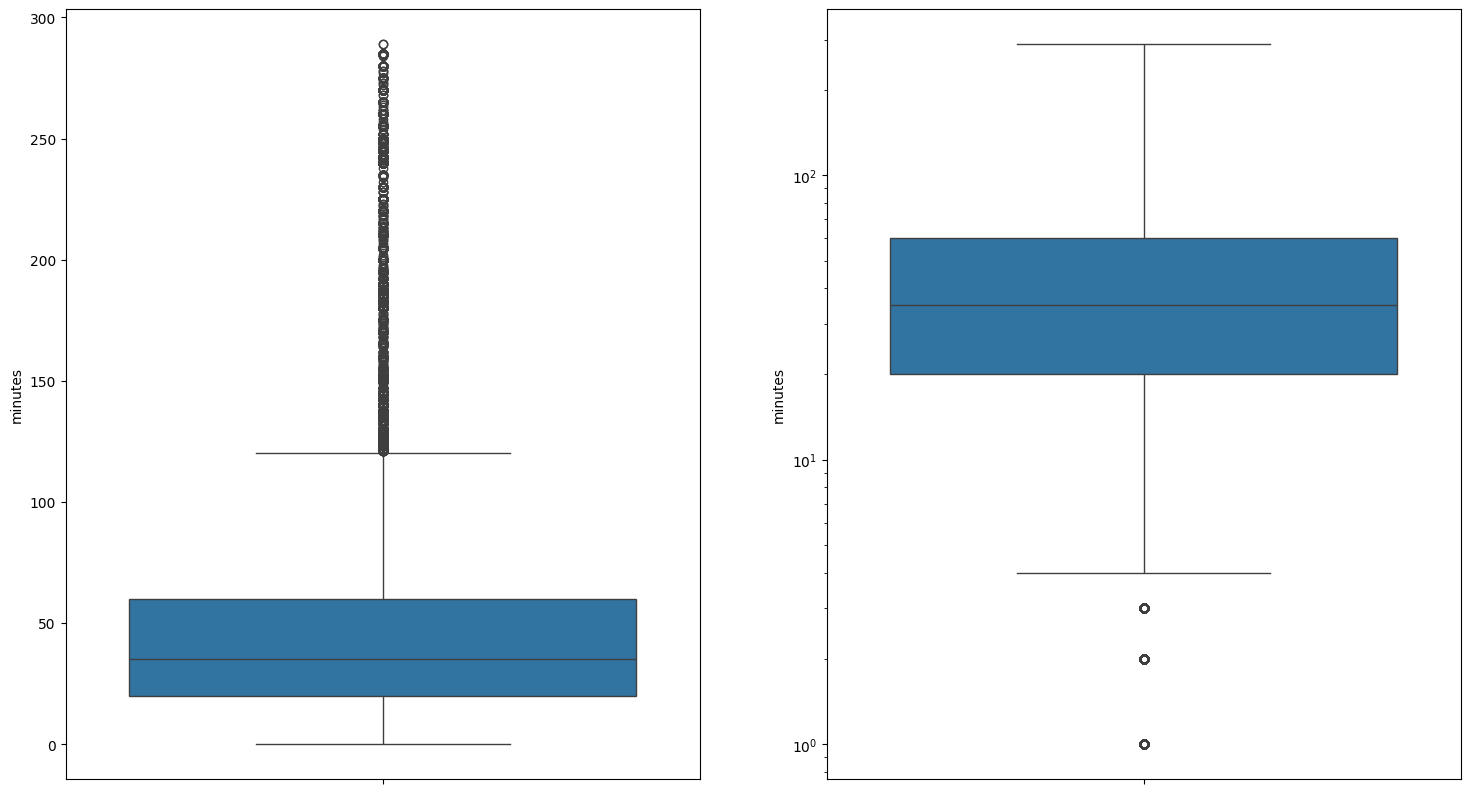

In [79]:
fig, axes = plt.subplots(1, 2, figsize=(18, 10))
sns.boxplot(y=df_recipes["minutes"], ax=axes[0])
sns.boxplot(y=df_recipes["minutes"], ax=axes[1], log_scale=True)

In [80]:
df_recipes[df_recipes['description'].isnull()]

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
5,apple a day milk shake,5289,0,1533,1999-12-06,"['15-minutes-or-less', 'time-to-make', 'course...","[160.2, 10.0, 55.0, 3.0, 9.0, 20.0, 7.0]",4,"['combine ingredients in blender', 'cover and ...",NaN,"['milk', 'vanilla ice cream', 'frozen apple ju...",4
8,bananas 4 ice cream pie,70971,180,102353,2003-09-10,"['weeknight', 'time-to-make', 'course', 'main-...","[4270.8, 254.0, 1306.0, 111.0, 127.0, 431.0, 2...",8,"['crumble cookies into a 9-inch pie plate , or...",NaN,"['chocolate sandwich style cookies', 'chocolat...",6
74,philly waldorf salad,5060,60,1534,1999-12-01,"['60-minutes-or-less', 'time-to-make', 'course...","[180.7, 22.0, 29.0, 3.0, 6.0, 33.0, 3.0]",4,"['combine softened cream cheese , orange juice...",NaN,"['philadelphia cream cheese', 'orange juice', ...",7
76,pizza stuffed potato,52443,25,1533,2003-01-28,"['30-minutes-or-less', 'time-to-make', 'course...","[183.3, 12.0, 9.0, 15.0, 21.0, 23.0, 6.0]",8,"['preheat oven to 450 degrees', 'cut potato in...",NaN,"['baking potato', 'mozzarella cheese', 'tomato...",7
99,the woiks dilly burgers,34930,32,23302,2002-07-24,"['bacon', '60-minutes-or-less', 'time-to-make'...","[449.2, 50.0, 16.0, 19.0, 58.0, 67.0, 2.0]",8,"['in a bowl , mix together the ground beef , m...",NaN,"[""mccormick's montreal brand steak seasoning"",...",9
...,...,...,...,...,...,...,...,...,...,...,...,...
231449,zucchini with onions and tomatoes,33602,50,23302,2002-07-08,"['60-minutes-or-less', 'time-to-make', 'course...","[84.4, 5.0, 28.0, 1.0, 6.0, 9.0, 4.0]",5,['melt the butter in a large saucepan and cook...,NaN,"['unsalted butter', 'onion', 'garlic', 'no-sal...",6
231492,zucchini potato and parmesan soup,73668,45,29300,2003-10-20,"['60-minutes-or-less', 'time-to-make', 'course...","[97.8, 4.0, 24.0, 15.0, 12.0, 3.0, 3.0]",14,['heat the oil in a large pot over medium heat...,NaN,"['extra virgin olive oil', 'onion', 'celery ri...",11
231493,zucchini red pepper leek frittata,41429,65,1533,2002-09-30,"['weeknight', 'time-to-make', 'course', 'main-...","[141.7, 6.0, 17.0, 9.0, 33.0, 4.0, 2.0]",11,['steam or microwave the vegetables together u...,NaN,"['zucchini', 'red pepper', 'leek', 'vegetable ...",7
231534,zucchini garlic pasta,49456,40,37779,2002-12-22,"['60-minutes-or-less', 'time-to-make', 'course...","[519.4, 31.0, 16.0, 19.0, 38.0, 36.0, 21.0]",11,['prepare pasta according to package direction...,NaN,"['wagon wheel macaroni', 'bacon', 'onion', 'ga...",8


In [81]:
now = datetime.now().strftime("%Y-%m-%d_%H-%M")  
df_recipes.to_csv(f"Data/cleaned_recipes_{now}.csv", index=False)